### Support Vector Machines in Python

<img src="svm.png" alt="A Support Vector Machine" style="width: 600px;">

In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
# from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [40]:
# ls

In [6]:
df = pd.read_csv("processed.cleveland.data",header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [9]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
len(df.loc[(df["ca"]=="?") | (df["thal"]=="?")])

6

In [12]:
df.loc[(df["ca"]=="?") | (df["thal"]=="?")]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [13]:
len(df)

303

So 6 of the 303 rows, or 2%, contain missing values. Since 303 - 6 = 297, and 297 is plenty of data to build a support vector machine, we will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain question marks in either the ca or thal columns:

In [14]:
df_no_missing = df.loc[(df["ca"]!="?") & (df["thal"]!="?")]

In [15]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [16]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### Split the Data into Dependent and Independent Variables

In [17]:
X=df_no_missing.drop('hd',axis=1).copy()

In [18]:
y=df_no_missing["hd"].copy()

In [19]:
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0




Now that we have split the data frame into two pieces, `X`, which contains the data we will use to make, or predict, classifications, and `y`, which contains the known classifications in our training dataset, we need to take a closer look at the variables in `X`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in `X` to remember how python is seeing the data right now.

In [20]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [21]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [22]:
pd.get_dummies(X, columns=['cp']).head

<bound method NDFrame.head of       age  sex  restbp   chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0   
1    67.0  1.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0   
2    67.0  1.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0   
3    37.0  1.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0   
4    41.0  0.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0   
..    ...  ...     ...    ...  ...      ...      ...    ...      ...    ...   
297  57.0  0.0   140.0  241.0  0.0      0.0    123.0    1.0      0.2    2.0   
298  45.0  1.0   110.0  264.0  0.0      0.0    132.0    0.0      1.2    2.0   
299  68.0  1.0   144.0  193.0  1.0      0.0    141.0    0.0      3.4    2.0   
300  57.0  1.0   130.0  131.0  0.0      0.0    115.0    1.0      1.2    2.0   
301  57.0  0.0   130.0  236.0  0.0      2.0    174.0    0.0      0.0    2.0   

      ca thal  cp_1.0

In [23]:
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [24]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [25]:
y_not_zero_idx = y>0
y[y_not_zero_idx]=1
y.unique()

array([0, 1], dtype=int64)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [27]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

In [28]:
predictions = clf_svm.predict(X_test_scaled)

In [29]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [30]:
y_test

169    0
214    1
63     0
155    1
5      0
      ..
284    1
126    1
158    1
226    0
76     1
Name: hd, Length: 75, dtype: int64

In [31]:
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
cm

array([[37,  5],
       [ 5, 28]], dtype=int64)

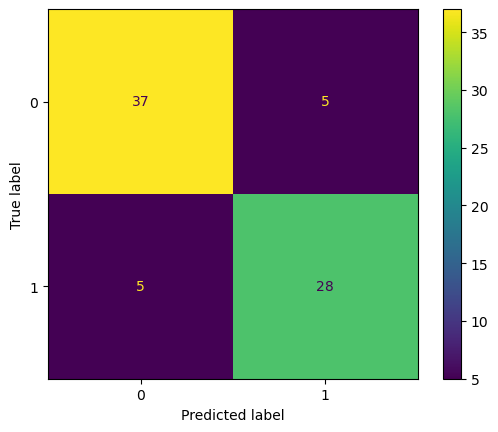

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
disp.plot()

In the confusion matrix, we see that of the 37 + 5 = 42 people that did not have Heart Disease, 37 (88%) were correctly classified. And of the 5 + 28 = 33 people that have Heart Disease, 28 (85%) were correctly classified. So the support vector machine did pretty well without any optimization. That said, it is possible that we can improve predictions using Cross Validation to optimize the parameters

In [33]:
param_grid=[{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

optimal_params=GridSearchCV(SVC(),param_grid,cv=5,verbose=0)
optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
clf_svm=SVC(random_state=42,C=10,gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

In [35]:
predictions = clf_svm.predict(X_test_scaled)

In [36]:
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
cm

array([[38,  4],
       [ 4, 29]], dtype=int64)

Of the 38 + 4 = 42 people that did not have heart disease, 38 (90%) were correctly classified. This is an improvement over the preliminary support vector machine, which only correctly classified 37 (88%) of the patients without heart disease. Of the 4 + 29 = 33 people with heart disease, 29 (87%) were correctly classified. This is also an improvement over the preliminary support vector machine, which only correctly classified 28 (85%) of the patients with heart disease. Yay for optimizing the parameters!

The last thing we are going to do is draw the optimized support vector machine decision boundary and discuss how to interpret it.

The first thing we need to do is count the number of columns in X:

In [37]:
len(df.columns)

14